__Ejercicio 1:__. Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.
* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

In [1]:
function Euler(f,x0,t0,tf,h)
    listt=t0:h:tf      #Arreglo de los valores de x t0< x < tf
    listx=zeros(length(listt)) #Arreglo donde se guardan los valores de la aproximación.
    listx[1] = x0          #El primer elemento es x0. 
    for i in 2:length(listt)   
        x0 = x0 + h * f(listx[i-1],listt[i-1]) # El valor de x0 se actualiza en cada paso del for, de modo que
        listx[i] = x0                #en el primer paso x0 corresponde a listx[1] en el segundo corresponde a listx[2], etc. 
        end                      
    return listt,listx  #La función nos devuelve el intervalo y la aproximación. 
    end;

In [2]:
using PyPlot

Con $x(0)=1$, $h=0.5,0.2,0.01$

In [3]:
f(x,t)=(-2.5x);

La solución exacta es $x=e^{-2.5(t)}$

In [4]:
intervalo1,aproximacion1 = Euler(f,1,0,8,0.5)  
intervalo2,aproximacion2 = Euler(f,1,0,8,0.2)  
intervalo3,aproximacion3 = Euler(f,1,0,8,0.01) 
intervalo4,aproximacion4 = Euler(f,1,0,8,1);

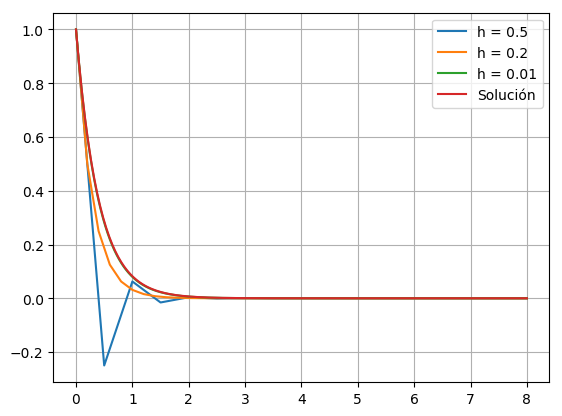

In [5]:
plot(intervalo1,aproximacion1,label="h = 0.5")
plot(intervalo2,aproximacion2,label="h = 0.2")
plot(intervalo3,aproximacion3,label="h = 0.01")
t=linspace(0,8,300)
plot(t,exp.(-2.5*t),label="Solución")
legend(),grid("on")
show()

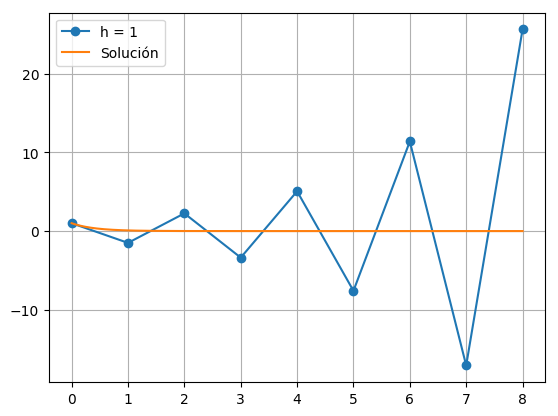

In [6]:
plot(intervalo4,aproximacion4,label="h = 1","o-")
plot(intervalo3,[e^(-2.5x) for x in intervalo3],label="Solución")
legend(),grid("on")
show();

Con $x(0)=2$, $h=0.5,0.2,0.01$

In [7]:
intervalo5,aproximacion5 = Euler(f,2.0,0.0,8.0,0.5)  
intervalo6,aproximacion6 = Euler(f,2.0,0.0,8.0,0.2)  
intervalo7,aproximacion7 = Euler(f,2.0,0.0,8.0,0.01) 
intervalo8,aproximacion8 = Euler(f,2.0,0.0,8.0,1)
solucion(t)=e^(-2.5*t)

solucion (generic function with 1 method)

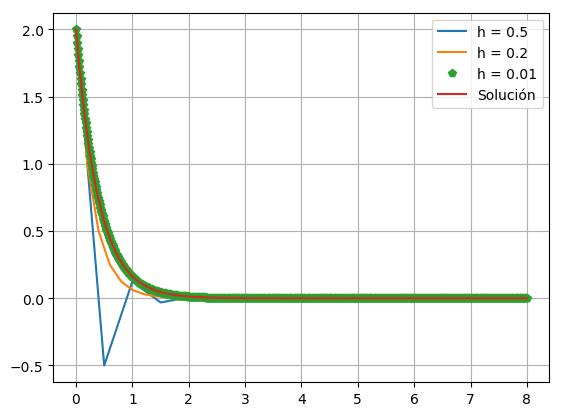

In [8]:
plot(intervalo5,aproximacion5,label="h = 0.5",)
plot(intervalo6,aproximacion6,label="h = 0.2",)
plot(intervalo7,aproximacion7,label="h = 0.01","p",)
t=linspace(0,8,1000)
plot(t,2exp.(-2.5*t),label="Solución")
legend(), grid("on")
show()

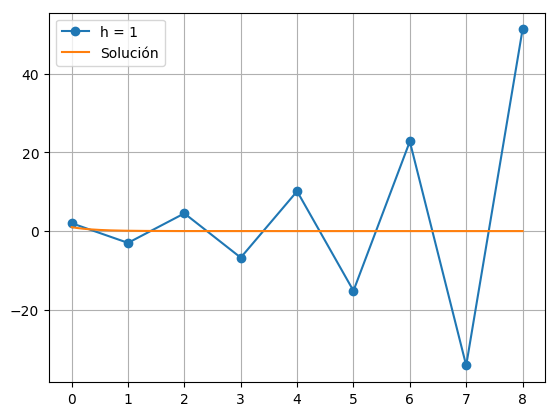

In [9]:
plot(intervalo8,aproximacion8,label="h = 1","o-")
plot(intervalo7,[e^(-2.5x) for x in intervalo7],label="Solución")
legend(), grid("on")
show();

__Ejercicio 2:__. ¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.


A simple vista, uno podría pensar que para resolver este
sistema uno debe desarrollar otro método para encontrar la
solución a la ecuación diferencial del ejercicio pasado. Sin
embargo, esto no es necesario.

Pertenece a un oscilador armónico.
Primero proponemos una solución general $x(t)=e^{yt}$ y obtendríamos la ecuación característica que es $y^2+k=0$ y si despejamos a $y$ obtendíamos las dos soluciones 

$$y_1=+i \sqrt k$$
$$y_2=-i \sqrt k$$

Entonces nuestra solución quedará de la forma
$$x(t)= C_1 e^{i\sqrt kt} + C_2 e^{-i\sqrt kt}$$

Si tomamos nuestras constantes $C_2= \frac{1}{2} =C_2$ vamos a obtener que 
$$ x_1(t)= \cos\sqrt kt $$

y si dejamos $C_1=-C_2= \frac{1}{2i}$ obtendríamos lo siguiente
$$x_2(t)=\sin\sqrt kt$$

por lo tanto la solución quedaría como 
$$x(t)=A\cos\sqrt kt + B\sin\sqrt kt$$



Derivamos para poder usa la condiciones iniciales
$$x'(t)= \frac{\sqrt k}{2\sqrt t} \left[-A\sin\sqrt kt + B \cos\sqrt kt \right]$$

con
$$x(0)=A\cos\sqrt 0 + B\sin\sqrt 0$$
$$x(0)=A$$

con $$x'(0)=\frac{\sqrt k}{2\sqrt 0} \left[-A\sin\sqrt 0 + B \cos\sqrt 0 \right]$$


con $$\frac{x'(0)}{\sqrt k} =  B $$

sustituyendo en la ecuacion de nuestra solución, quedará de la siguiente forma

$$x(t)=x(0)\cos\sqrt kt + \frac{x'(0)}{\sqrt k}\sin\sqrt kt$$

__Ejercicio 3:__. Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?

Tenemos que $u = \dot{x}(t)$ donde $u(0) = x'(t)$ entonces su derivada viene dada por $\dot u = \ddot x(t)$ con esto llegaríamos a un sistema de ecuaciones diferenciales dadas por

$$\dot x = u $$
$$\dot u = -kx$$

__Ejercicio 4:__. Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

* Para utilizar el método de Euler, impleméntelo para sistemas de más de una dimensión.

In [10]:
function f(x,t,k) 
#Se crea una función que es un vector que servirá para implementar el método de Euler en su     forma vectorial
    return [x[2],-k*x[1]] #Se regresan las componentes del vector. 
    end;


In [11]:
function Euler_vec(f,x0,t0,tf,h,k) #el x0 van a entrar las condiciones iniciales
    listt = collect(t0:h:tf) # nos va  mostrar los elementos en el intervalo como lista
    listx = [] 
    x = x0 
        for j in 1:length(listt)
            push!(listx,x)
        x = x + f(x,listt[j],k)*h       #el valor se va a actualizar y a almacenar en listx  
        end
    return listt, listx #nos devuelve el intervalo, y la lista de los x_vector
end

Euler_vec (generic function with 1 method)

In [12]:
Euler_vec(f,[2,3],0,10,0.5,1)

([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5  …  5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0], Any[[2, 3], [3.5, 2.0], [4.5, 0.25], [4.625, -2.0], [3.625, -4.3125], [1.46875, -6.125], [-1.59375, -6.85938], [-5.02344, -6.0625], [-8.05469, -3.55078], [-9.83008, 0.476563]  …  [-6.896, 10.1875], [-1.80225, 13.6355], [5.0155, 14.5366], [12.2838, 12.0289], [18.2982, 5.88696], [21.2417, -3.26216], [19.6106, -13.883], [12.6691, -23.6884], [0.824961, -30.0229], [-14.1865, -30.4354]])

In [13]:
Euler_vec(f,[2,3],0,10,0.2,1)

([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8  …  8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8, 10.0], Any[[2, 3], [2.6, 2.6], [3.12, 2.08], [3.536, 1.456], [3.8272, 0.7488], [3.97696, -0.01664], [3.97363, -0.812032], [3.81123, -1.60676], [3.48987, -2.369], [3.01607, -3.06698]  …  [5.45364, -5.93023], [4.26759, -7.02096], [2.8634, -7.87448], [1.28851, -8.44716], [-0.400923, -8.70486], [-2.14189, -8.62467], [-3.86683, -8.19629], [-5.50609, -7.42293], [-6.99067, -6.32171], [-8.25502, -4.92358]])

In [14]:
Euler_vec(f,[2,3],0,10,0.01,1)

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99, 10.0], Any[[2, 3], [2.03, 2.98], [2.0598, 2.9597], [2.0894, 2.9391], [2.11879, 2.91821], [2.14797, 2.89702], [2.17694, 2.87554], [2.2057, 2.85377], [2.23423, 2.83171], [2.26255, 2.80937]  …  [-3.3287, -1.80942], [-3.34679, -1.77613], [-3.36455, -1.74266], [-3.38198, -1.70902], [-3.39907, -1.6752], [-3.41582, -1.64121], [-3.43223, -1.60705], [-3.4483, -1.57273], [-3.46403, -1.53824], [-3.47941, -1.5036]])

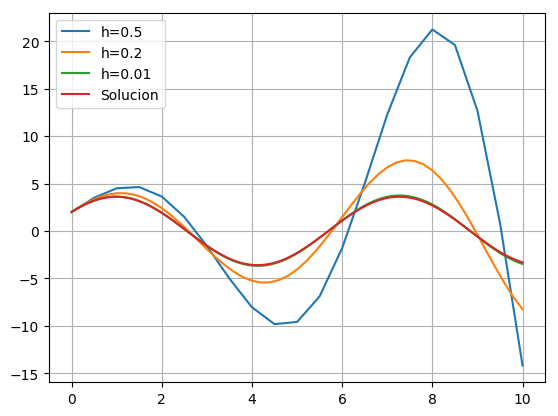

In [15]:
plot(Euler_vec(f,[2,3],0,10,0.5,1)[1],map(x->x[1],Euler_vec(f,[2,3],0,10,0.5,1)[2]),label="h=0.5")
plot(Euler_vec(f,[2,3],0,10,0.2,1)[1],map(x->x[1],Euler_vec(f,[2,3],0,10,0.2,1)[2]),label="h=0.2");
plot(Euler_vec(f,[2,3],0,10,0.01,1)[1],map(x->x[1],Euler_vec(f,[2,3],0,10,0.01,1)[2]),label="h=0.01");

t=linspace(0,10,100)
y=2cos.(t)+3sin.(t)
plot(t,y,label="Solucion")

legend(),grid("on"),show();


__Ejercicio 5:__ Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

In [16]:
f(x,t)=(2x-18t)/(1+t);

In [17]:
# Condición inicial x(0)=4
interva2,aproxi2 = Euler(f,4,0,8,0.5)

(0.0:0.5:8.0, [4.0, 8.0, 10.3333, 11.0, 10.0, 7.33333, 3.0, -3.0, -10.6667, -20.0, -31.0, -43.6667, -58.0, -74.0, -91.6667, -111.0, -132.0])

In [18]:
interva3,aproxi3 = Euler(f,4,0,8,0.2)

(0.0:0.2:8.0, [4.0, 5.6, 6.86667, 7.8, 8.4, 8.66667, 8.6, 8.2, 7.46667, 6.4  …  -101.4, -110.133, -119.2, -128.6, -138.333, -148.4, -158.8, -169.533, -180.6, -192.0])

In [19]:
interva4,aproxi4 = Euler(f,4,0,8,0.01)

(0.0:0.01:8.0, [4.0, 4.08, 4.15901, 4.23703, 4.31406, 4.3901, 4.46515, 4.53921, 4.61228, 4.68436  …  -242.071, -242.775, -243.479, -244.184, -244.89, -245.597, -246.305, -247.014, -247.725, -248.436])

In [20]:
interva5,aproxi5 = Euler(f,4,0,8,1)

(0:1:8, [4.0, 12.0, 15.0, 13.0, 6.0, -6.0, -23.0, -45.0, -72.0])

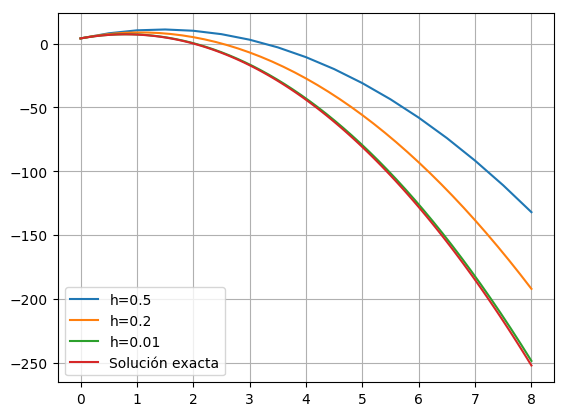

In [21]:
plot(interva2,aproxi2,label="h=0.5")
plot(interva3,aproxi3,label="h=0.2")
plot(interva4,aproxi4,label="h=0.01")

t = linspace(0,8,100)
plot(t,-5t.^2+8t.+4,label="Solución exacta")
legend(), grid()
show()

Vemos que mientras más disminuimos a h, más se aproxima a la solución general

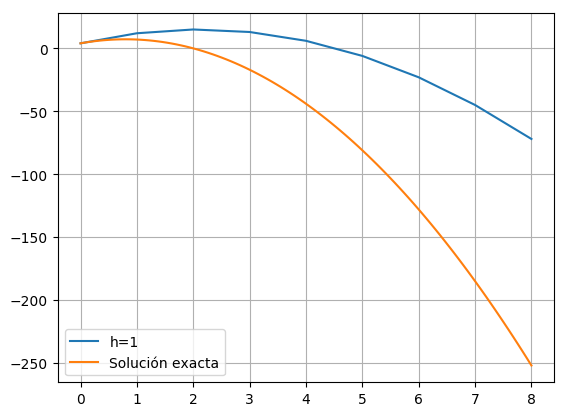

In [22]:
plot(interva5,aproxi5,label="h=1")
t = linspace(0,8,100)
plot(t,-5t.^2+8t.+4,label="Solución exacta")
legend(), grid()
show()